# THE SPARKS FOUNDATION : **COMPUTER VISION AND IOT**
# TASK_2 :- **COLOR IDENTIFICATION IN IMAGES**
# Name: **Ankit Kiran Yadav**

**Import Necessary Libraries**

In [2]:

import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import os
from skimage.color import rgb2lab, deltaE_cie76

In [3]:

def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('off')
    plt.show()

The type of this input is <class 'numpy.ndarray'>
Shape: (1080, 1000, 3)


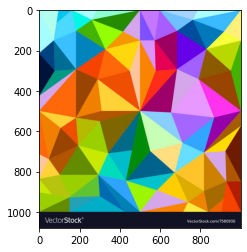

In [4]:
image = cv2.imread(r'/bin/image.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

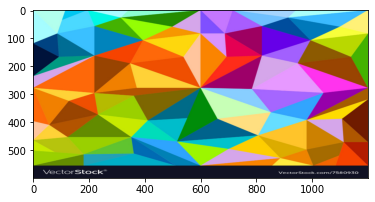

In [5]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

# **Color Identification of the Selected Image**

In [6]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [7]:

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [8]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)

    center_colors = clf.cluster_centers_

    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

[array([252.72045127, 253.15092771, 252.34700662]),
 array([209.23166441, 237.11115407,   5.80877634]),
 array([ 20.28220766,  65.86287359, 252.11496648]),
 array([251.73511027,  64.98509776,   6.41821273]),
 array([  5.63526431, 237.51076817, 208.69906714]),
 array([253.36207175,   3.90453396, 128.2498252 ]),
 array([194.06350683,   4.81202566, 250.31298046]),
 array([ 27.5569511 , 253.44616491,  27.50172579])]

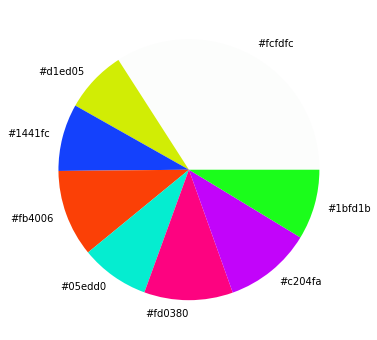

In [10]:

get_colors(get_image(r'/bin/image1.jpg'), 8, True)

# **Searching Images using Color**

In [30]:
IMAGE_DIRECTORY = r'/bin/img'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
   
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

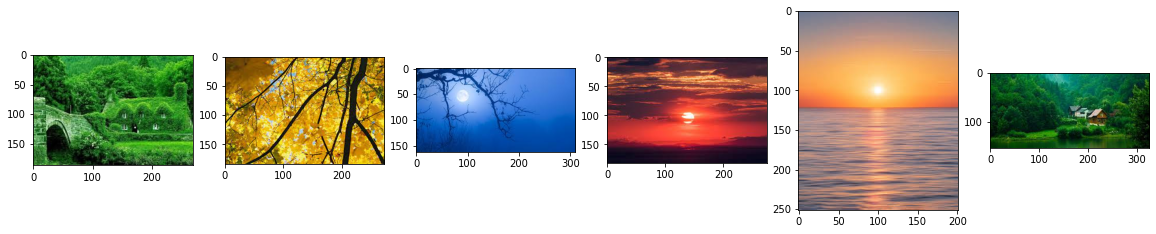

In [31]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [33]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [34]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

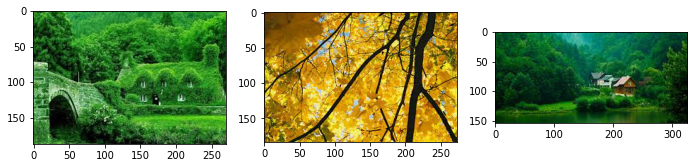

In [35]:

plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

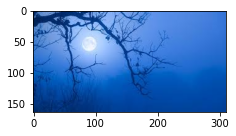

In [36]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

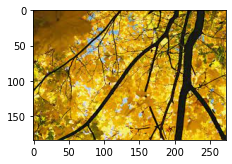

In [37]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)